In [335]:
### 1. readlines, read -> 바이트 -> 유니코드 디코딩
### 2. codecs(스트리밍 인코더) -> 유니코드 디코딩 / 파일 크기가 거대할 때 유용
import codecs

with codecs.open('movie_corpus/ratings_train.txt', encoding='utf-8') as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:]

In [341]:
from pprint import pprint

pprint(data[:100])

[['9976970', '아 더빙.. 진짜 짜증나네요 목소리', '0'],
 ['3819312', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '1'],
 ['10265843', '너무재밓었다그래서보는것을추천한다', '0'],
 ['9045019', '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정', '0'],
 ['6483659',
  '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
  '1'],
 ['5403919', '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.', '0'],
 ['7797314', '원작의 긴장감을 제대로 살려내지못했다.', '0'],
 ['9443947',
  '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 '
  '연기못하는사람만모엿네',
  '0'],
 ['7156791', '액션이 없는데도 재미 있는 몇안되는 영화', '1'],
 ['5912145', '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?', '1'],
 ['9008700', '걍인피니트가짱이다.진짜짱이다♥', '1'],
 ['10217543', '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~', '1'],
 ['5957425', '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해', '0'],
 ['8628627', '담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.', '1'],
 ['9864035', '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지', '0'],
 ['6852435', 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ', '1'],
 ['9143163',
  '참 사람들

In [343]:
X = list(zip(*data))[1]
y = np.array(list(zip(*data))[2], dtype=int)

In [345]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

model1 = Pipeline([
    ('vect', CountVectorizer()),
    ('mnb', MultinomialNB()),
])

In [347]:
model1.fit(X, y)

Pipeline(steps=[('vect', CountVectorizer()), ('mnb', MultinomialNB())])

In [350]:
import codecs
with codecs.open('movie_corpus/ratings_test.txt', encoding='utf-8') as f:
    data_test = [line.split('\t') for line in f.read().splitlines()]
    data_test = data_test[1:]

In [355]:
X_test = list(zip(*data_test))[1]
y_test = np.array(list(zip(*data_test))[2], dtype=int)

In [356]:
print(classification_report(y_test, model1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83     24827
           1       0.84      0.81      0.82     25173

    accuracy                           0.83     50000
   macro avg       0.83      0.83      0.83     50000
weighted avg       0.83      0.83      0.83     50000



## Tf-idf

In [398]:
from sklearn.feature_extraction.text import TfidfVectorizer

model2 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('mnb', MultinomialNB()),
])

model2.fit(X, y)
print(classification_report(y_test, model2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83     24827
           1       0.84      0.81      0.83     25173

    accuracy                           0.83     50000
   macro avg       0.83      0.83      0.83     50000
weighted avg       0.83      0.83      0.83     50000



### 형태소 분석기

In [407]:
from konlpy.tag import Okt
pos_tagger = Okt()

def tokenize_pos(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc)]

In [408]:
model3 = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize_pos)),
    ('mb', MultinomialNB()),
])

In [409]:
model3.fit(X, y)
print(classification_report(y_test, model3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85     24827
           1       0.86      0.85      0.85     25173

    accuracy                           0.85     50000
   macro avg       0.85      0.85      0.85     50000
weighted avg       0.85      0.85      0.85     50000



### N그램

In [419]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]
y = iris.target

In [421]:
X = pd.DataFrame(X, columns=['sepal_length', 'sepal_width'])

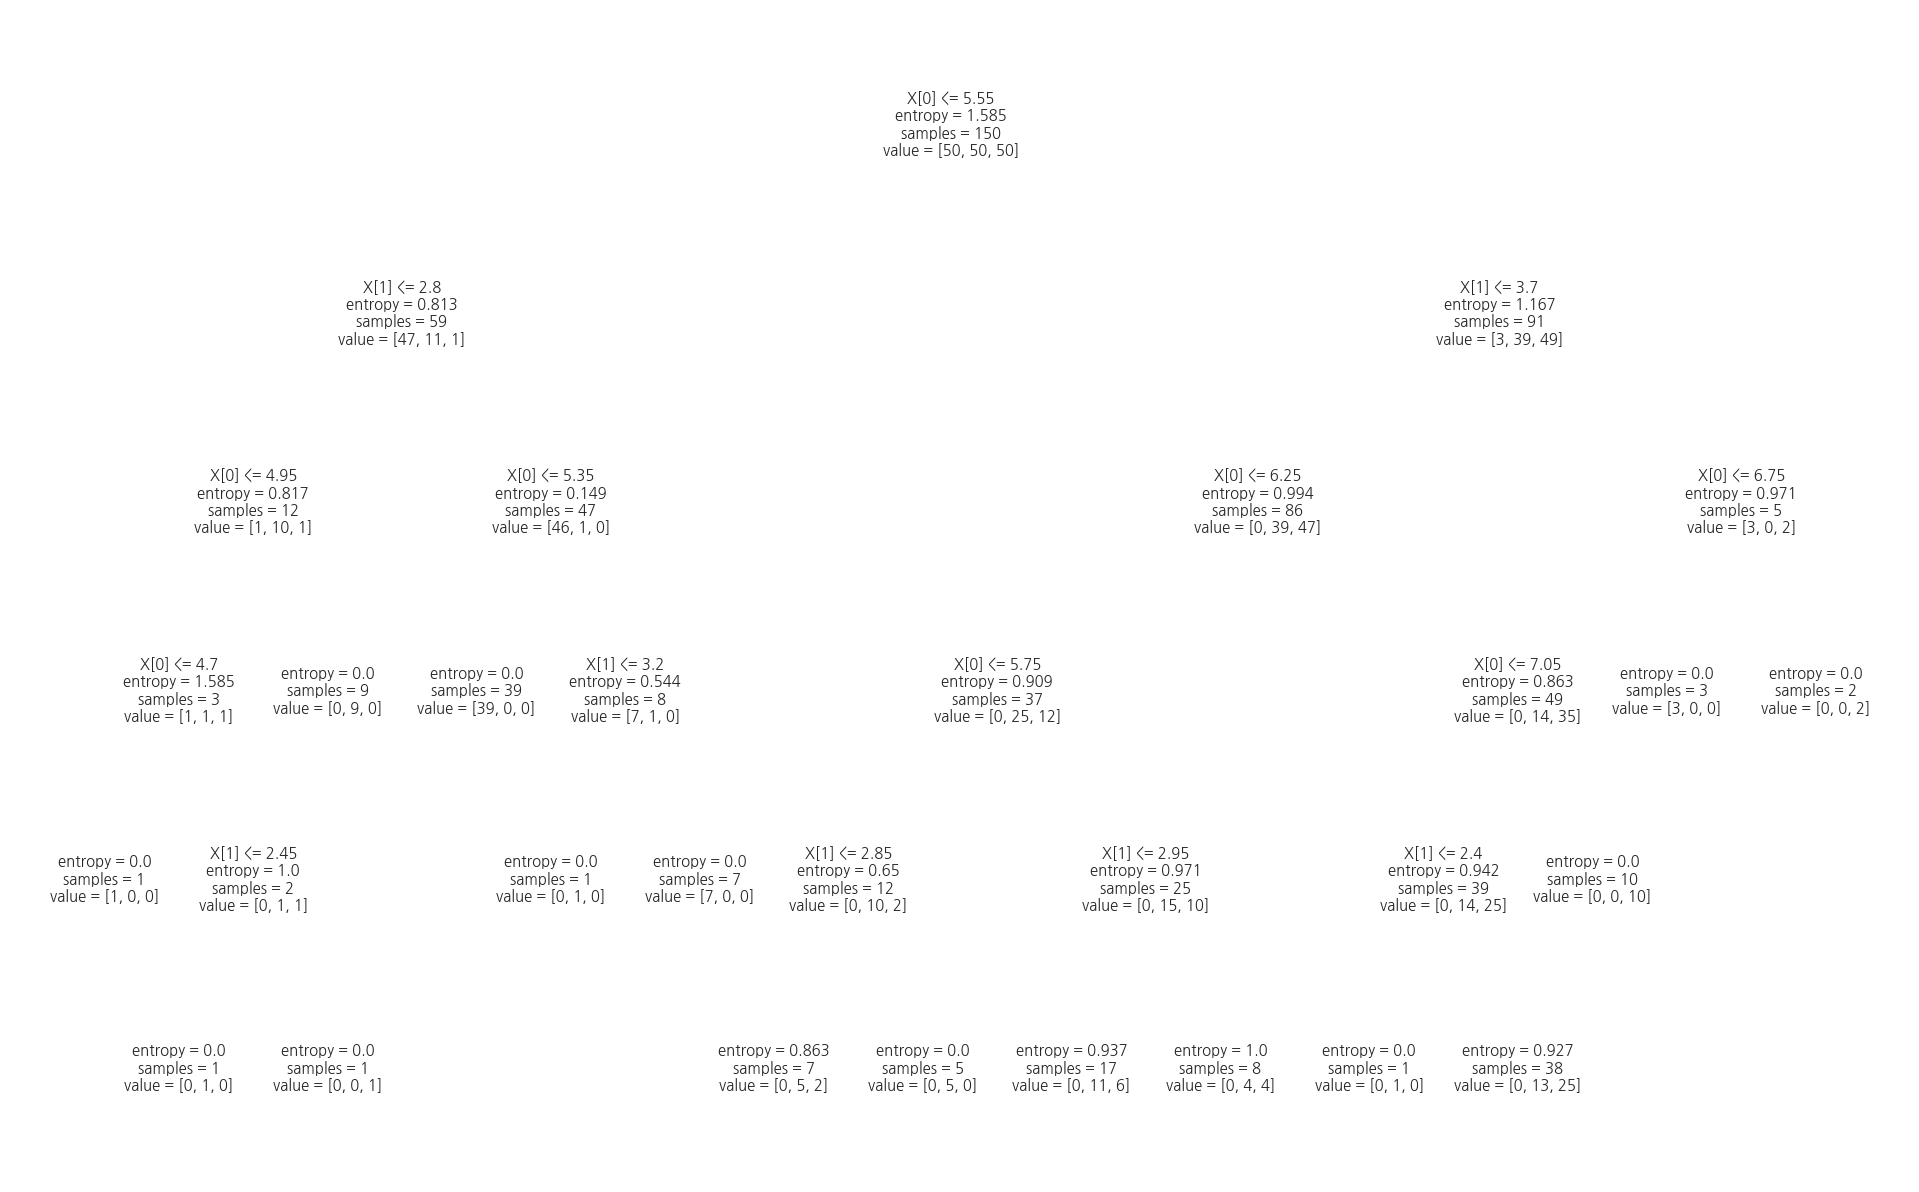

In [558]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(criterion='entropy', max_depth=5).fit(X, y)
plot_tree(dt)
plt.show()

In [563]:
y_pred = dt.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.76      0.74      0.75        50
           2       0.75      0.76      0.75        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



In [562]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(5, shuffle=True)

cross_val_score(dt, X, y, scoring='accuracy', cv=cv).mean()

0.74

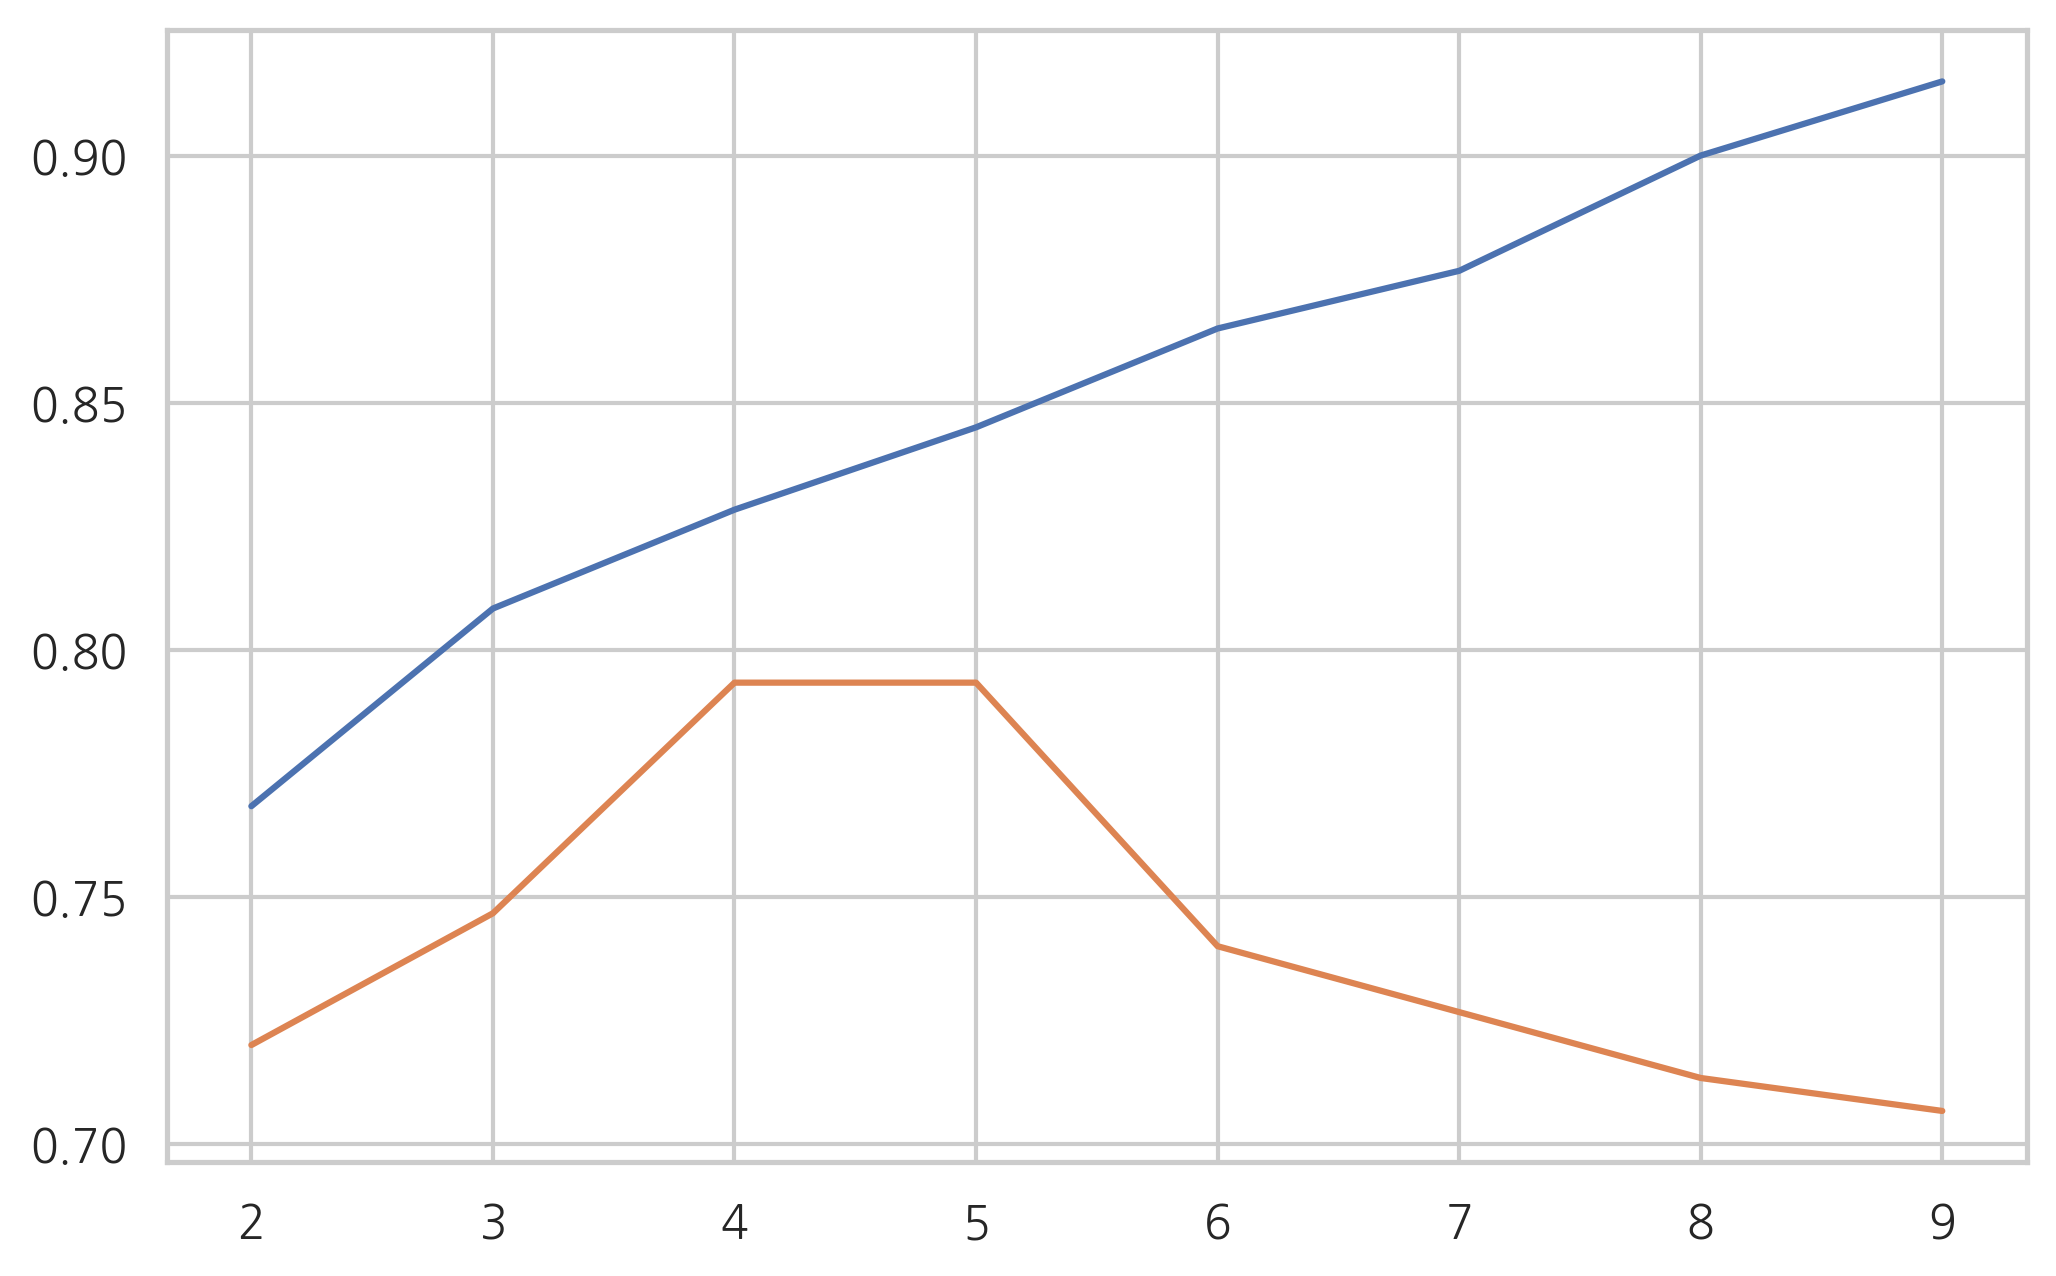

In [557]:
from sklearn.model_selection import validation_curve

depths = np.arange(2, 10)
train_score, test_score = validation_curve(dt, X, y, 'max_depth', depths)

plt.plot(depths, train_score.mean(axis=1))
plt.plot(depths, test_score.mean(axis=1))
plt.show()

In [564]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [576]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

dt = DecisionTreeClassifier(max_depth=4, criterion='entropy').fit(X, y)
y_hat = dt.predict(X)
print(classification_report(y, y_hat))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       212
           1       0.99      0.98      0.99       357

    accuracy                           0.98       569
   macro avg       0.98      0.99      0.98       569
weighted avg       0.98      0.98      0.98       569

